# Algorithmic Foundations

Below are notes from each section of the qiskit course documentation found on this page: https://learn.qiskit.org/course/algorithms/algorithmic-foundations

## Introduction

We saw clear advantages of quantum over classical in the query model - but all of these had the form of an input function coming in the form of an oracle or a black box versus something that we are explicitly. Thus in the latter case, can we still show quantum advantage?

## Two examples: factoring and GCDs

One such problem is the _Integer Factorization_ problem which looks like the following:

Input: an integer $N \ge 2$ <br>
Output: the prime factorization of $N$

where the _prime factorization_ of $N$ means a list of prime factors of $N$ and the powers to which they must be raised to obtain $N$ by multiplication. For instance, the prime factors of 12 are 2 and 3 where 12 = 2 x 2 x 3. For each positive integer of $N \ge 2$, there is only one prime factorization which is a fact known as the _fundamental theorem of arithmetic_.

While there are some python packages that can help factor numbers, the larger the input the longer it takes to calculate an answer. And for larger values of N, things can become impossibly difficult. For example, there was an RSA Factoring Challenge run by RSA Laboratories from 1991 to 2007 that offered $100,000 to factor a number that had 309 decimal digits but the prize was never collected and its prime factors remain unknown.

The fastest known algorithm for factoring large integers is known as the _number field sieve_ and was able to win the RSA250 challenge back in 2020 using thousands of CPU core-years. This is the basis of RSA public-key cryptosystems.

Another problem is the _Greatest Common Divisor (GCD)_ problem which looks like the following:

Input: nonnegative integers $N$ and $M$, at least one of which is positive <br>
Output: the greatest common divisor of N and M

where the GCD is the largest integer that evenly divides both of them. This problem is easy for computers - we can run it on 2 numbers larger than the RSA1024 each in a blink of an eye. This is possible because we have a very efficient algorithm for computing GCDs known as Euclids algorithm (discovered 2000+ yrs ago).

Could there be a fast algorithm then for integer factorization that we just haven't yet discovered? The answer could be yes, although many experts for many years have searched for it.

## Measuring computational cost

### Encodings and input length

We'll first focus on the input and output aspects of computational problems and for this lesson, we are limiting to just binary strings (although symbols and other stuff could be considered). Through binary strings, we can encode a variety of interesting objects such as numbers, vectors, matrices, and graphs, as well as lists of these and other objects. Below are some examples:

* Binary notation: Encodes nonnegative integers where 100 is 4, 101 is 5, 111 is 7, etc.
* Binary notation with sign bit: Encodes positive & negative Integers with an additional _sign bit_ (+ or -)
* Unary: Encodes nonnegative integers through 0 vector strings where the length encodes the integer

However our inputs/outputs are encoded, we interpret the _length_ of the input string as a representation of the _size_ of the problem instance. Using binary notation, we need $1 + log_2(N)$ bits to represent this value so that is the _size_ of our problem.

Computation tasks can be viewed as abstractly transforming input binary strings to output binary strings and at that point, we have already selected the encoding scheme. Thus the encoding scheme is important to the computations at some level. However, we assume

### Elementary operations

Elementary operations are operations that involve a small, fixed number of bits/qubits that can be performed quickly and easily. For circuit based models of computation, it is typical that each _gate_ is viewed as an elementary operation. Qiskit is going to adopt the following as the default gate set for quantum circuits: $X, Y, Z, H, S, S^{\dagger}, T, T^{\dagger}, CNOT$, and standard basis measurements. However, sometimes people view Toffoli, Hadamard, S gates, and standard basis measurements as being elementary.

The unitary gates in the default set listed above are called the _universal_ gate set. This means that any unitary operation can be approximated on any number of qubits and to any degree of accuracy with circuits composed of these gates alone. So this just basically means that any state can be created using however many gates from this set as you want given the precision you're looking for.

For Boolean circuits, the elementary operations are: AND, OR, NOT, and FANOUT. These form a universal set for deterministic computations meaning that any function from any fixed number of input bits to a fixed numberof output bits can be implemented with these gates.

An important aspect of quantum circuits is the idea of deferred measurement. Ideally, we don't want to be making measurements in the mdidle of our circuit; its just easier to have our quantum computations consist of a completely unitary part followed by a read-out measurement phase at the end. This can always be done provided we're willing to add an additional qubit for each measurement. Look at the circuits below: the left makes an instant measurement and writes to a classical bit (represented by double lined wires on the bottom) whereas the circuit on the right can be seen as "writing the value of a qubit to another qubit" and then we can continue using the initial qubit and can measure the other one later.

![image deferred-measurment](./deferred-measurement.png)

### Circuit size and depth

The total number of gates within a circuiit is the circuit's size and thus its _computational cost_, represented by size(C). The number of gates/elementary operations is meant to be a proxy for the time it will take to perform a computation. But this isn't always a perfect proportion because sometimes gates can be performed in parallel leading to bigger circuits being run faster than smaller circuits if there is more parallelization available. Thus, a different way to measure efficiency for circuits is to measure their _depth_, which is the minimum number of layers of gates needed within the circuit. This is also the maximum number of gates encountered on any path from an input wire to an output wire.

Another aspect to our measurement cost is the cost of each individual gate. Up to now, we have assumed that its a uniform cost for each operation but that isn't always true. In our Boolean circuits, FANOUT gates are typically viewed as being free and having actually 0 cost. In our query models in the last section, we gave a unit cost for each query of the input function but said every other operation (such as the Hadamards before and after the query) was free. Lastly, on some hardware, some gates are more expensive than others. So while it is not necessarily true to say all elementary gates have the same cost, we'll keep to simpler models of computational cost.

### Cost as a function of input length

We are primarily interested ini how computational costs scale as inputs become larger and larger. Thus we want to represent the cost of algorithms as a _function_ of the input length. We are ultimately looking for $t(n) = siize(C_n)$ where $t(n)$ is the computational cost of the circuit where our input has a length of n.

If we consider the case of addition for a boolean circuit, it can be worked out that we need 21*n - 11 gates to implement for 2 nonnegative integers of size n-bits consider the set of default gates assigned above. Thus, this circuit grows linearly with the length of our input.

While the specific number of gates (21n-11) is great, we typically don't look at complexity with that much detail and instead we just look at their _order_ size, whiich is known as _Big-O_ notation. Formally, we say that given 2 functions $g(n)$ and $h(n)$, then $g(n) = O(h(n))$ if there exists a positive real number $c \gt 0$ and a positive integer $n_0$ such that:

$g(n) \le c \cdot h(n)$

for all $n \ge n_0$. Typically, $h(n)$ is chosen to be as simple as possible for the statement to hold true. So given $17n^3 - 257n^2 + 65537$, we say its $O(n^3)$. This generality allows us to observe what we saw before with the addition Boolean circuit: it scales linearly. This statement is true whether we consider XOR gates as elementary or not, FANOUTS as not, etc; it still is linear and thus this level of complexity analysis is not sensitive to low level details like that.

<font color=orange>Algorithms that have a **polynomial** cost are of the form O(n^c) for some choice of a fixed constant c > 0.</font> In general, algorithms that have a polynomial cost are viewed as representing _efficient_ algorithms. <font color=orange>Algorithms that have an **exponential** cost have the form 0(2^n).</font> Examples of this include the classical algorithms for integer factoring. The so-called _NP-complete_ problems are a class of problems not known to (and widely conjectured not to) have polynomial-cost algorithms and the _exponential-time hypothesis_ posits that no NP-complete problem can have a sub-exponential cost algorithm.

When it comes to quantum advantages, there tends to be a focus on exponential, or at least super-polynomial, classical algorithms and finding a polynomial quantum algorithm for the max quantum advantage to be seen. At this scale of benefit, there is the greatest chances of actual practical advantages but this is very difficult and only a few examples have been found. However, even quantum algorithms that offer polynomial improvements over classical algorithms are still important.

One final cost of circuit computation is the cost associated with the pattern of the circuits themselves. For example, the description of each member $C_n$ in a circuit family could be determined by some extremely difficult to compute function of $n$. This is definitely a problem and thus this course only introduces families of circuits that have _uniformity_ meaning they are computationally easy to obtain the descriptoin of each circuit in a family. So while a circuit could be simply to run, it could be very computationally difficult to describe and that is the cost that we are 1) ignorinig here and 2) assuming is low and neglible.

## Classical computations on quantum computers

### Simulating Boolean circuits with quantum circuits

Boolean circuits are composed of AND, OR, NOT, and FANOUT gates. We can convert each of these to quantum gates using the set of quantum operators of NOT, CNOT, and Toffoli gates.

Toffoli gates are CCX gates and work similarly to the AND gate but since they're not a part of our default elementary set, we can construct them using H, T, Tdagger, and CNOT. 

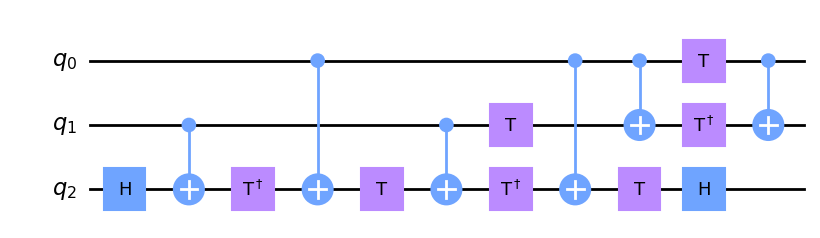

<IPython.core.display.Latex object>

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex

Toffoli = QuantumCircuit(3)

Toffoli.h(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(2)
Toffoli.cx(1, 2)
Toffoli.tdg(2)
Toffoli.cx(0, 2)
Toffoli.t(1)
Toffoli.t(2)
Toffoli.cx(0, 1)
Toffoli.t(0)
Toffoli.tdg(1)
Toffoli.h(2)
Toffoli.cx(0, 1)

display(Toffoli.draw())
U = Operator(Toffoli)

array_to_latex(U)

A Tofolli gate can be combined with some NOT gates to also create the equivalent of an OR gate. FANOUT gates are easily implemented by CNOT gates in the same way that the _deferred measurement_ was done. Lastly, NOT gates are implemented through an NOT unitary operator (X gate). Ultimately, we can take a classical Boolean circuit (left) and convert it to a quantum circuit (right) where we have our input state $\ket{x}$ in the top n qubits and $\ket{f(x)}$ encoded in the top n qubits after the circuit is run, as well as k workspace qubits on the bottom that we can mostly disregard.

![image circuits](./reversible-circuit-simulation.png)

<font color=orange>A swap gate can be implemented with 3 CNOTs in a row with target, contol like (1,0), (0, 1), (1, 0).</font> The qiskit course brought this up regarding f(x) being on the top n qubits and the workspace qubits being on the bottom k qubits but I'm making note of this because it's an interesting observation.

### Cleaning up the garbage

If all we want our circuit to do is compute f(x), then the above quantum circuit is fine. However, if we wish to use it as a subroutine, then we need to clean up the "garbage" or the stuff encoded in the workspace qubits because otherwise, they will interfere with other components of the overall computational routine/circuit. This is pretty straightforward for a quantum circuit because all we need to do to "clean up the garbage" is to reset the workspace by running the circuit in reverse on them. What this becomes then is the addition of _another_ m qubits for which we can "copy" the output $\ket{f(x)}$ to using CNOT, and then we can run the reverse of our circuit to get back the final registers of $\ket{x}, \ket{0^k}, \ket{y \oplus f(x)}$.

![image garbage-comp](./garbage-free-computation.png)

If our classical algorithm has t gates, then the circuit above has O(t) gates so its a linear scale of t. In the circuit above, if we ignore the k qubits for the workspace, it looks like a query gate. We can use it such that if we encode an input x into the top register and have the y register be all 0s, when we run the circuit, we'll get f(x) on the bottom m qubits. Or we could encode the y register to be something different to maybe take advantage of phase kickback like in Deutsch's or Deutsch-Jozsa algorithm. This shows that any query algorithm that can be computed on a Boolean circuiit can be converted to a unitary implementation.

<font color=red>Comment: </font>It's interesting to see qiskit (and even myself earlier) use the word "copy" for the middle part of the circuit shown above with all the CNOTs considering the no-copy/cloning theorem. But its hard _not_ to describe it as copying.